# Visão geral dos dados

In [104]:
# Importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
# Lendo os dataframes
df_orders = pd.read_csv(r"C:\Users\pedro\Documents\Dataframes projetos\instacart-analysis\instacart_orders.csv", sep=';')
df_products = pd.read_csv(r"C:\Users\pedro\Documents\Dataframes projetos\instacart-analysis\products.csv", sep=';')
df_aisles = pd.read_csv(r"C:\Users\pedro\Documents\Dataframes projetos\instacart-analysis\aisles.csv", sep=';')
df_departments = pd.read_csv(r"C:\Users\pedro\Documents\Dataframes projetos\instacart-analysis\departments.csv", sep=';')
df_order_products = pd.read_csv(r"C:\Users\pedro\Documents\Dataframes projetos\instacart-analysis\order_products.csv", sep=';')

In [108]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [5]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [7]:
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [8]:
df_order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


# Preparando os dados

### DataFrame `orders`

In [11]:
# Verificando valores duplicados
print(df_orders.duplicated().sum())

15


In [12]:
# Removento duplicados
df_orders = df_orders.drop_duplicates()

In [13]:
# Verificando as linhas duplicadas mais uma vez
print(df_orders.duplicated().sum())

0


In [14]:
# Veriricando valores ausentes
print(df_orders.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


<span style="color: black; font-family: Arial; font-size: 20px;">
Existem valores ausentes apenas na coluna 'days_since_prior_order'.

### DataFrame `products`

In [19]:
# Verificando valores duplicados
print(df_products.duplicated().sum())

0


In [135]:
# Veriricando valores ausentes
print(df_products.isna().sum())

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


In [137]:
# Verificando os nomes de produtos duplicados que não estão faltando
df_products[~(df_products['product_name'].isna()) & (df_products['product_name'].str.lower().duplicated())]

,product_id,product_name,aisle_id,department_id
2058,2059,Biotin 1000 Mcg,47,11
5455,5456,Green Tea With Ginseng and Honey,96,20
5558,5559,Cream Of Mushroom Soup,69,15
7558,7559,Cinnamon Rolls with Icing,105,13
9037,9038,American Cheese slices,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [24]:
# Encontrando valores ausentes na coluna 'product_name'
print(df_products['product_name'].value_counts(dropna=False))

product_name
NaN                                      1258
Chocolate Sandwich Cookies                  1
Krinkle Cut Carolina BBQ Potato Chips       1
Fresh Ground Turkey- 85% Lean/15% Fat       1
Organic Unsweetened Ketchup                 1
                                         ... 
Organic Fresh Carrot Chips                  1
Unbleached Jumbo Baking Cups                1
Super Glue Gel Control                      1
3 Cheese Ravioli                            1
BURRITO- STEAK & CHEESE                     1
Name: count, Length: 48437, dtype: int64


<span style="color: black; font-family: Arial; font-size: 20px;">
Existem 1258 valores ausentes

<span style="color: blue; font-family: Arial; font-size: 20px;">
Todos os nomes de produtos ausentes estão associados com o corredor de ID 100?

In [27]:
dfr=df_products[df_products['product_name'].isna()]
dfr['aisle_id'].unique()

array([100], dtype=int64)

<span style="color: black; font-family: Arial; font-size: 20px;">
Sim, todos os nomes de produtos ausentes estão associados com o corredor de ID 100

<span style="color: blue; font-family: Arial; font-size: 20px;">
Todos os nomes de produtos ausentes estão associados com o departamento de ID 21?

In [30]:
dfrt = dfr[dfr['aisle_id']==100]['department_id']
print(dfrt)

37       21
71       21
109      21
296      21
416      21
         ..
49552    21
49574    21
49640    21
49663    21
49668    21
Name: department_id, Length: 1258, dtype: int64


<span style="color: black; font-family: Arial; font-size: 20px;">
Todos os nomes de produtos ausentes estão associados com o departamento de ID 21.

<span style="color: blue; font-family: Arial; font-size: 20px;">
Preencha nomes de produtos ausentes com 'Unknown'

In [145]:
df_products['product_name'] = df_products['product_name'].fillna('Unknown')

### DataFrame `departments`

In [148]:
# Verificando valores duplicados
print(df_departments.duplicated().sum())

0


In [150]:
# Verificando valores ausentes
print(df_departments.isna().sum())

department_id    0
department       0
dtype: int64


### DataFrame `aisles`

In [152]:
# Verificando valores duplicados
print(df_aisles.duplicated().sum())

0


In [154]:
# Verificando valores ausentes
print(df_aisles.isna().sum())

aisle_id    0
aisle       0
dtype: int64


### DataFrame `order_products`

In [43]:
# Verificando valores duplicados
print(df_order_products.duplicated().sum())

0


In [44]:
# Verificando valores ausentes
print(df_order_products.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


<span style="color: blue; font-family: Arial; font-size: 20px;">
Substitua valores ausentes na coluna 'add_to_cart_order' por 999 e converta a coluna para o tipo integer

In [162]:
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999)
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype('int')
print(df_order_products)
print()
df_order_products.info()

         order_id  product_id  add_to_cart_order  reordered
0         2141543       11440                 17          0
1          567889        1560                  1          1
2         2261212       26683                  1          1
3          491251        8670                 35          1
4         2571142        1940                  5          1
...           ...         ...                ...        ...
4545002    577211       15290                 12          1
4545003   1219554       21914                  9          0
4545004    692640       47766                  4          1
4545005    319435         691                  8          1
4545006   1398151       28733                  9          0

[4545007 rows x 4 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_or

# Análise de dados

<span style="color: blue; font-family: Arial; font-size: 20px;">
Verifique se os valores nas colunas 'order_hour_of_day' e 'order_dow' na tabela orders fazem sentido (ou seja, os valores da coluna 'order_hour_of_day' variam de 0 a 23 e os da 'order_dow' variam de 0 a 6).

<Axes: title={'center': 'Pedidos a cada hora do dia'}, ylabel='Frequency'>

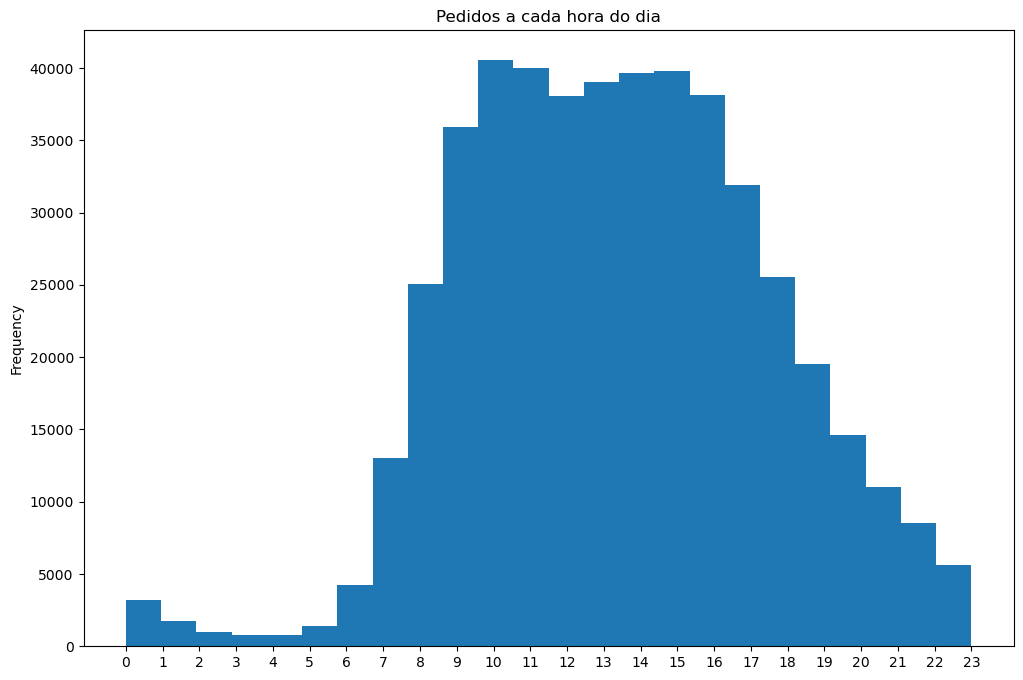

In [51]:
df_orders['order_hour_of_day'].plot.hist(title='Pedidos a cada hora do dia', figsize=[12, 8], bins=24, xticks=list(range(0,24)))

<Axes: title={'center': 'Pedidos a cada dia da semana'}, ylabel='Frequency'>

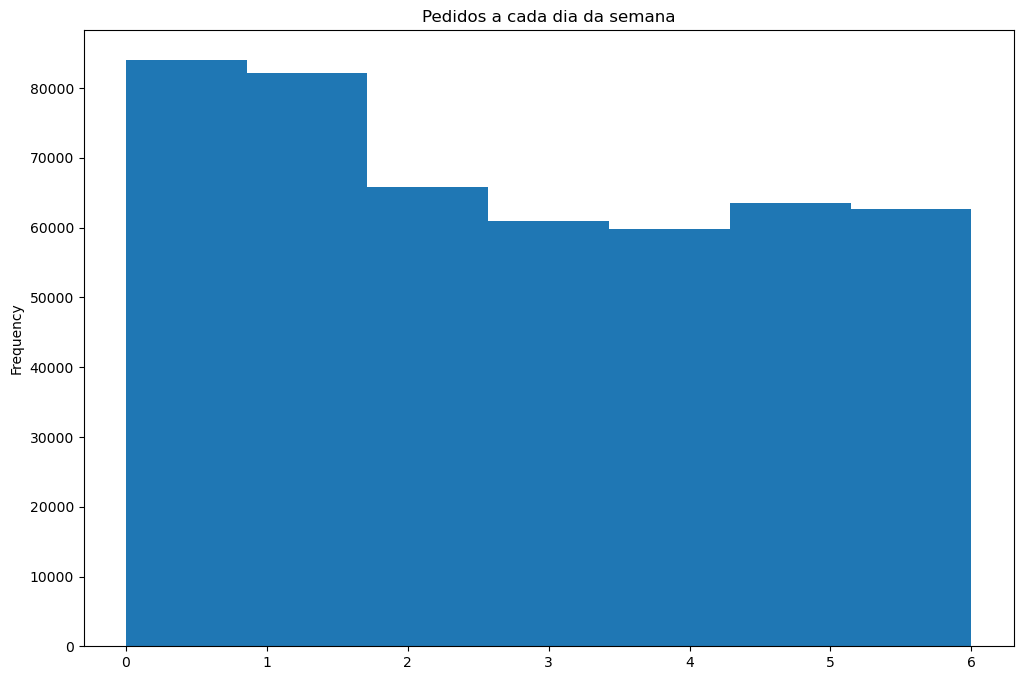

In [52]:
df_orders['order_dow'].plot.hist(title='Pedidos a cada dia da semana', figsize=[12, 8], bins=7, xticks=list(range(0,7)))

<span style="color: black; font-family: Arial; font-size: 20px;">
Sim, os valores nas colunas 'order_hour_of_day' e 'order_dow' fazem sentido porque terminam em 24 e 6, respectivamente.

<span style="color: blue; font-family: Arial; font-size: 20px;">
Quantas pessoas fazem pedidos a cada hora do dia?

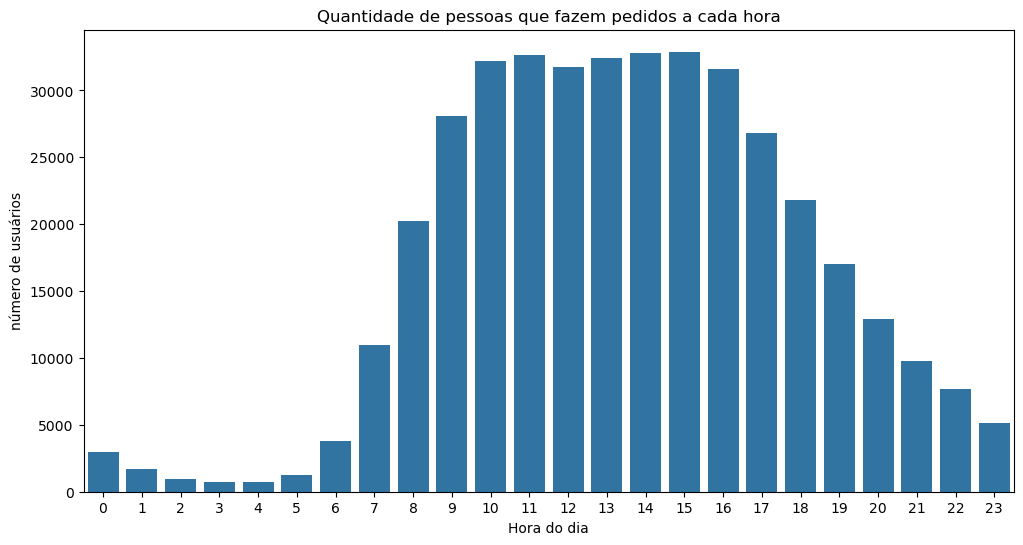

In [55]:
users_per_hour = df_orders.groupby('order_hour_of_day')['user_id'].nunique().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x='order_hour_of_day', y= 'user_id', data=users_per_hour)
plt.xlabel('Hora do dia')
plt.ylabel('número de usuários')
plt.title('Quantidade de pessoas que fazem pedidos a cada hora')
plt.show()

<span style="color: black; font-family: Arial; font-size: 20px;">
No horário de pico, que é das 10h até as 16h, aproximadamente 30.000 pessoas fazem pedidos

<span style="color: blue; font-family: Arial; font-size: 20px;">
Em que dia da semana as pessoas compram produtos alimentícios?

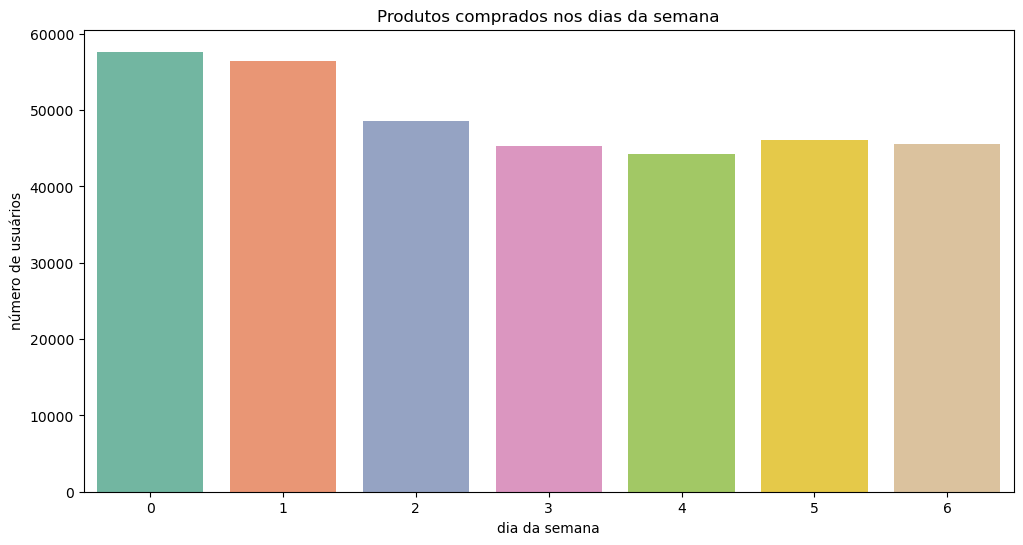

In [58]:
week_day = df_orders.groupby('order_dow')['user_id'].nunique().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x='order_dow', y= 'user_id', data=week_day, hue='order_dow', palette='Set2', legend=False)
plt.xlabel('dia da semana')
plt.ylabel('número de usuários')
plt.title('Produtos comprados nos dias da semana')
plt.show()

<span style="color: black; font-family: Arial; font-size: 20px;">
As pessoas compram produtos alimenticios todos os dias, mas domingo é o dia que tem mais pessoas comprando.

<span style="color: blue; font-family: Arial; font-size: 20px;">
Quanto tempo as pessoas esperam até fazer outro pedido?

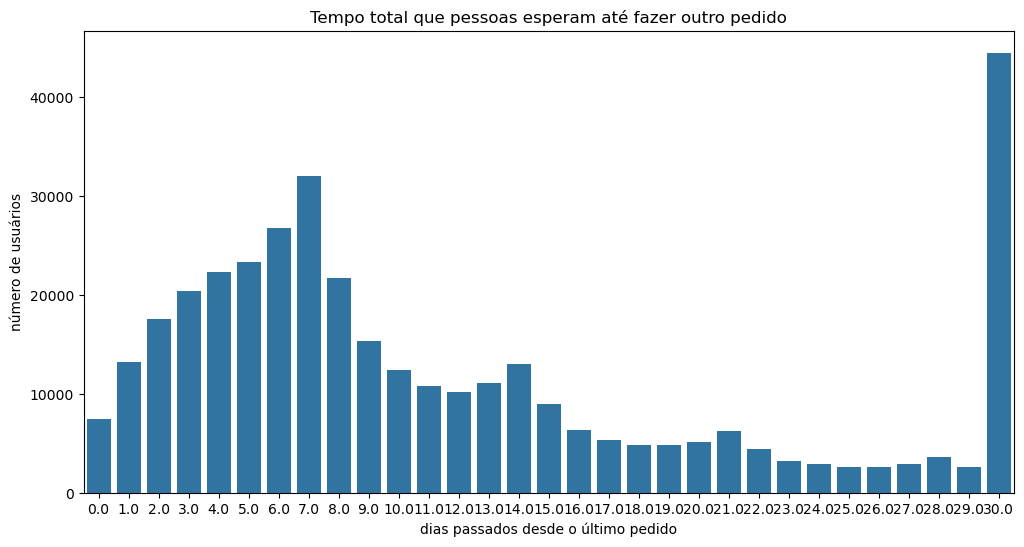

In [61]:
waiting_days = df_orders.groupby('days_since_prior_order')['user_id'].nunique().reset_index() 
plt.figure(figsize=(12,6))
sns.barplot(x='days_since_prior_order', y= 'user_id', data=waiting_days)
plt.xlabel('dias passados desde o último pedido')
plt.ylabel('número de usuários')
plt.title('Tempo total que pessoas esperam até fazer outro pedido')
plt.show()

<span style="color: black; font-family: Arial; font-size: 20px;">
A maioria dos usuários levam 30 dias para fazer outro pedido.

<span style="color: blue; font-family: Arial; font-size: 20px;">
Quais as diferenças nas quartas e sábados em 'order_hour_of_day'?

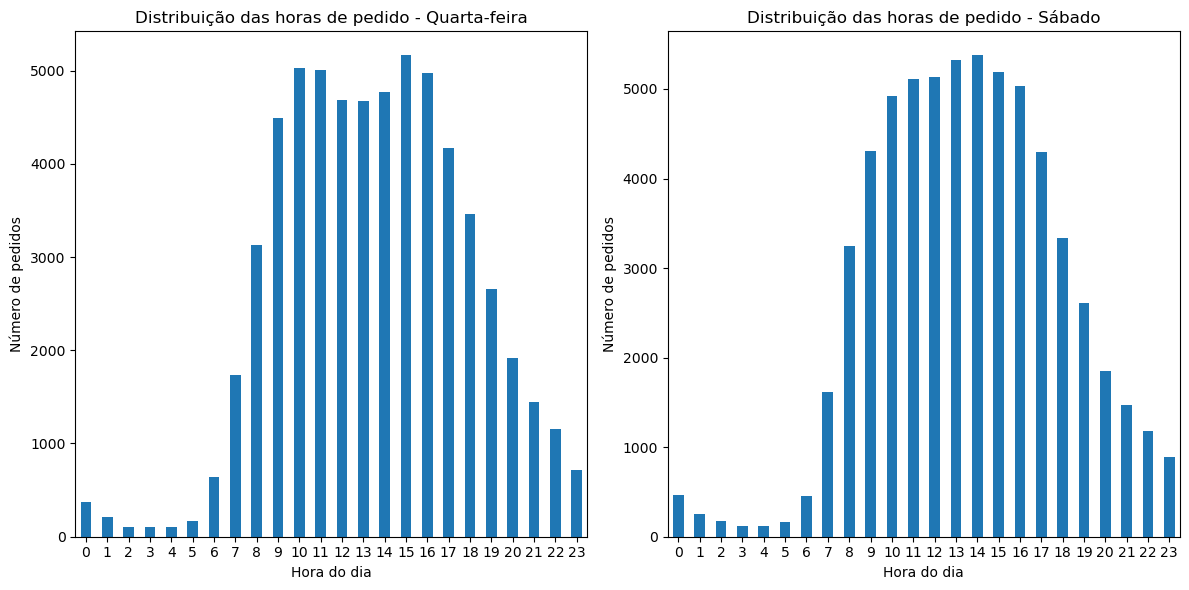

In [64]:
# Selecionando as quartas e sábados
wed_orders = df_orders[df_orders['order_dow'] == 3]
sat_orders = df_orders[df_orders['order_dow'] == 6]

plt.figure(figsize=(12,6))

#gráfico quarta-feira
plt.subplot(1, 2, 1)
wed_orders['order_hour_of_day'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribuição das horas de pedido - Quarta-feira')
plt.xlabel('Hora do dia')
plt.ylabel('Número de pedidos')
plt.xticks(rotation=0)

#gráfico sábado
plt.subplot(1, 2, 2)
sat_orders['order_hour_of_day'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribuição das horas de pedido - Sábado')
plt.xlabel('Hora do dia')
plt.ylabel('Número de pedidos')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

<span style="color: black; font-family: Arial; font-size: 20px;">
Através da análise, é possível notar que os horários de pico (das 9h até as 17h) e os horários com menos pedidos (da meia noite até as 6h) são bem parecidos em ambos os dias.

<span style="color: blue; font-family: Arial; font-size: 20px;">
Qual é a distribuição do número de pedidos por cliente?

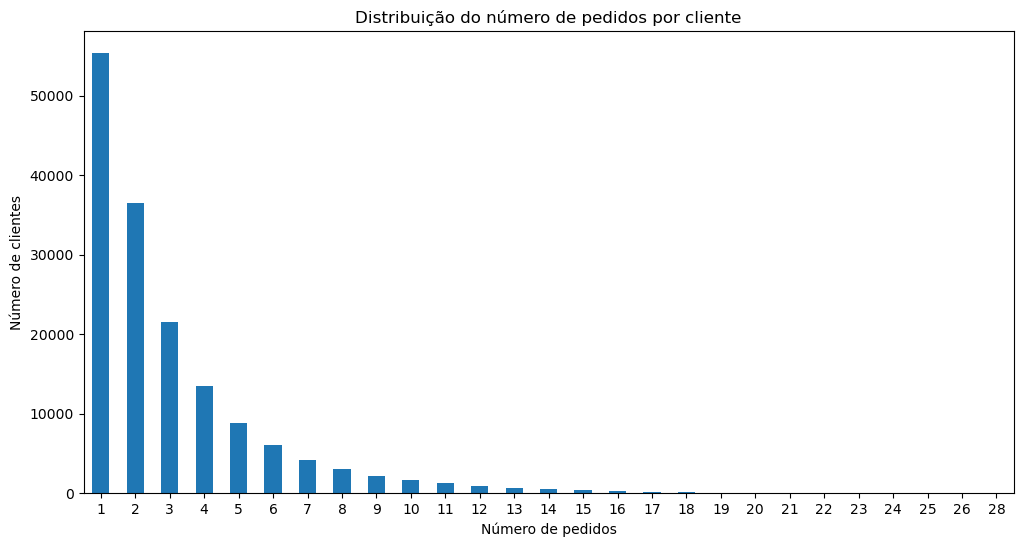

In [67]:
# pedidos feitos por cliente
orders_per_user = df_orders.groupby('user_id')['order_id'].nunique()

# clientes que fizeram o mesmo número de pedidos
order_distribution = orders_per_user.value_counts().sort_index()

plt.figure(figsize=(12,6))
order_distribution.plot(kind='bar')
plt.title('Distribuição do número de pedidos por cliente')
plt.xlabel('Número de pedidos')
plt.ylabel('Número de clientes')
plt.xticks(rotation=0)

plt.show()

<span style="color: black; font-family: Arial; font-size: 20px;">
Através da análise é possível notar que a maioria dos clientes fez apenas um pedido, e que o número de pedidos por pessoa cai à medida que vai aumentando.

<span style="color: blue; font-family: Arial; font-size: 20px;">
Quais são os 20 produtos mais populares? Exiba os IDs e nomes.

In [70]:
frequency_products = pd.merge(df_order_products, df_products[['product_id', 'product_name']])
frequency_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name
0,2141543,11440,17,0,Chicken Breast Tenders Breaded
1,567889,1560,1,1,Bag Of Ice
2,2261212,26683,1,1,Cafe Latte Pure Lightly Sweetened Iced Coffee ...
3,491251,8670,35,1,Diced Tomatoes
4,2571142,1940,5,1,Organic 2% Reduced Fat Milk


In [71]:
top_products = frequency_products.groupby(['product_id', 'product_name']).count().sort_values(['order_id'], ascending=False)
top_products.head(20)

,,order_id,add_to_cart_order,reordered
product_id,product_name,,,
24852,Banana,66050,66050,66050
13176,Bag of Organic Bananas,53297,53297,53297
21137,Organic Strawberries,37039,37039,37039
21903,Organic Baby Spinach,33971,33971,33971
47209,Organic Hass Avocado,29773,29773,29773
47766,Organic Avocado,24689,24689,24689
47626,Large Lemon,21495,21495,21495
16797,Strawberries,20018,20018,20018
26209,Limes,19690,19690,19690


<span style="color: blue; font-family: Arial; font-size: 20px;">
Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?

Média de itens por pedido: 10.10


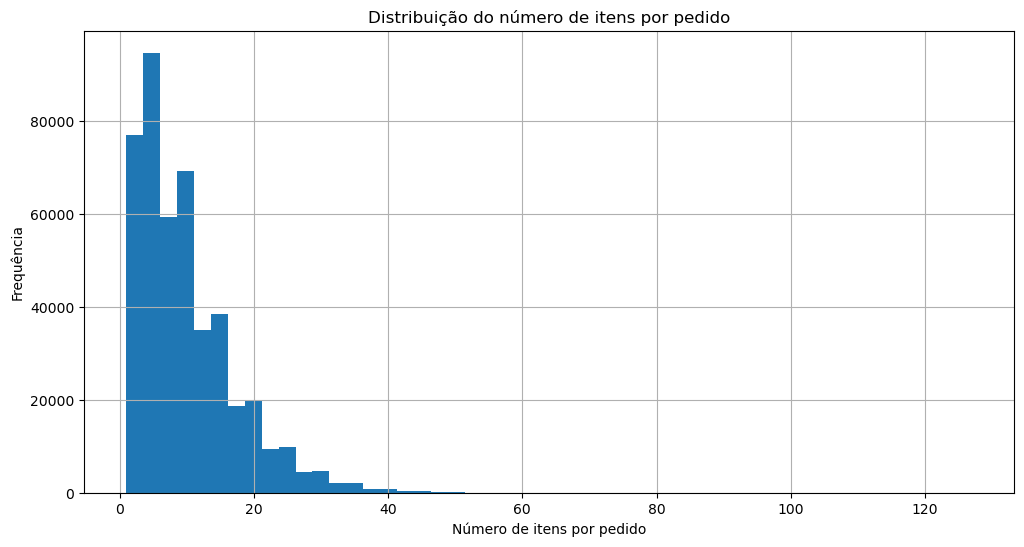

In [73]:
# contando número de itens por pedido
items_per_order = df_order_products.groupby('order_id')['product_id'].count()

# calculando a média do numero de itens por pedido
average_itens_per_order = items_per_order.mean()
print(f'Média de itens por pedido: {average_itens_per_order:.2f}')

plt.figure(figsize=(12,6))
items_per_order.plot(kind='hist', bins=50)
plt.title('Distribuição do número de itens por pedido')
plt.xlabel('Número de itens por pedido')
plt.ylabel('Frequência')
plt.grid(True)

plt.show()

<span style="color: black; font-family: Arial; font-size: 20px;">
As pessoas compram em média 10 produtos por pedido.

<span style="color: blue; font-family: Arial; font-size: 20px;">
Quais são os 20 principais itens incluídos com mais frequência em pedidos repetidos? Exiba os IDs e nomes.

In [76]:
reorder_products = df_order_products[df_order_products['reordered'] == 1]
reorder_products.head()

,order_id,product_id,add_to_cart_order,reordered
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1
5,2456893,21616,4,1


In [77]:
produtos_regulares = pd.merge(reorder_products, df_products[['product_id', 'product_name']])

In [78]:
top_reordered_products = produtos_regulares.groupby(['product_id', 'product_name']).size().sort_values(ascending=False)
top_reordered_products.head(20)

product_id  product_name            
24852       Banana                      55763
13176       Bag of Organic Bananas      44450
21137       Organic Strawberries        28639
21903       Organic Baby Spinach        26233
47209       Organic Hass Avocado        23629
47766       Organic Avocado             18743
27845       Organic Whole Milk          16251
47626       Large Lemon                 15044
27966       Organic Raspberries         14748
16797       Strawberries                13945
26209       Limes                       13327
22935       Organic Yellow Onion        11145
24964       Organic Garlic              10411
45007       Organic Zucchini            10076
49683       Cucumber Kirby               9538
28204       Organic Fuji Apple           8989
8277        Apple Honeycrisp Organic     8836
39275       Organic Blueberries          8799
5876        Organic Lemon                8412
49235       Organic Half & Half          8389
dtype: int64

<span style="color: black; font-family: Arial; font-size: 20px;">
Acima estão os 20 principais itens incluídos com mais frequência em pedidos repetidos, destacando-se a banana com 55763 pedidos.

# Conclusões e recomendações

<span style="color: black; font-family: Arial; font-size: 20px;">
A análise revelou padrões consistentes de comportamento de compra e consumo ao longo do tempo.

    
- O maior volume de pedidos ocorre em horários de pico entre 9h e 17h, sendo que o período de 10h a 16h concentra cerca de 30 mil pedidos.
    
- Alimentos são comprados diariamente, com pico de vendas aos domingos.
  
- O ciclo médio de recompra é de 30 dias, porém a maior parte dos clientes realiza apenas uma compra.

- Em média, cada pedido contém cerca de 10 itens, com destaque para a banana, que lidera o ranking de itens mais recorrentes em pedidos repetidos (55.763 ocorrências).

<span style="color: black; font-family: Arial; font-size: 20px;">
Como recomendações, destacam-se:
    
1. **Aproveitar o horário de pico**  
   - Reforçar campanhas de marketing e promoções entre 9h e 17h, principalmente de 10h a 16h, para aumentar a conversão.  

2. **Explorar o pico de vendas aos domingos**  
   - Criar ofertas para o fim de semana, especialmente para domingo.  
   - Planejar equipe e logística para atender à alta demanda.  

3. **Estimular recompra antes dos 30 dias**  
   - Criar campanhas com ofertas personalizadas para clientes que estão há 20–25 dias sem comprar.  
   - Implementar programas de fidelidade para incentivar pedidos mais frequentes.   

4. **Aproveitar os produtos mais vendidos**  
   - Destacar a banana e outros produtos do top 20 em campanhas, garantindo preços competitivos.  
   - Utilizar esses produtos como “porta de entrada” para atrair clientes para outros itens da cesta.  